In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

#ValueError: Unable to parse string " " at position 488

In [7]:
num = df['TotalCharges'].iloc[488]
num

' '

In [8]:
df = df.drop(488)

In [9]:
df = df.replace(' ',np.nan)


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [11]:
df.shape

(7042, 21)

In [12]:
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.shape

(7032, 21)

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

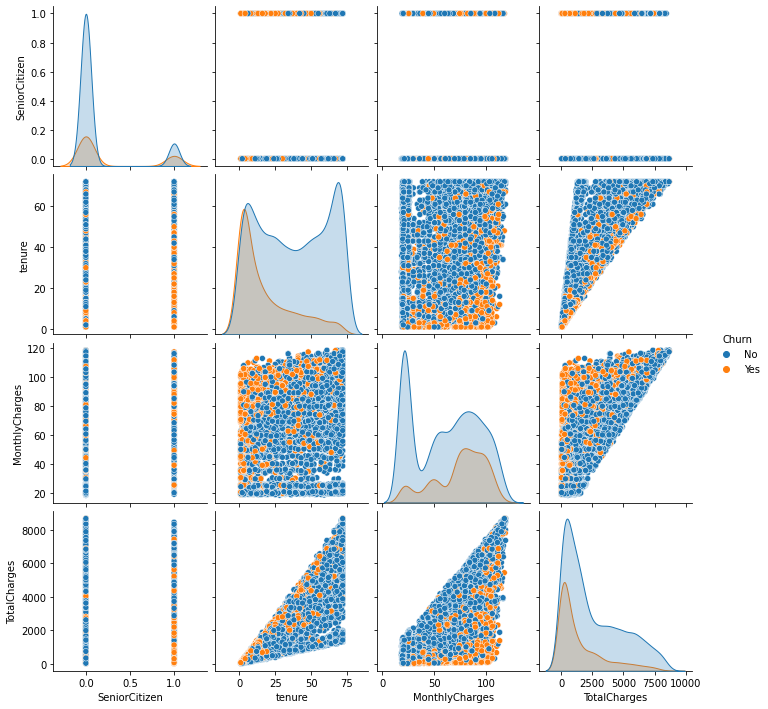

In [15]:
sns.pairplot(df,hue='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

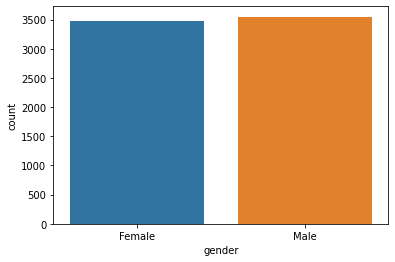

In [16]:
sns.countplot(x=df['gender'])

In [17]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

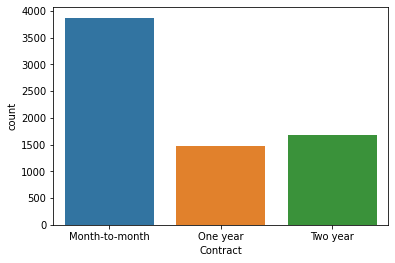

In [18]:
sns.countplot(x=df['Contract'])

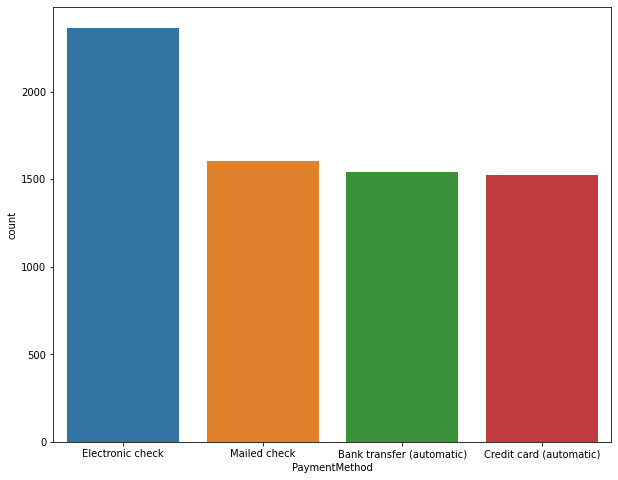

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['PaymentMethod'])
plt.show()

<AxesSubplot:xlabel='Partner', ylabel='count'>

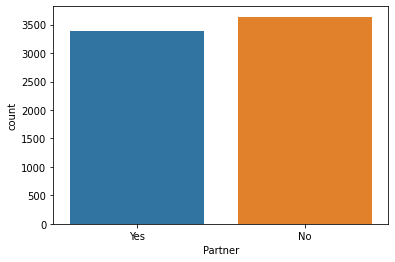

In [20]:
sns.countplot(x=df['Partner'])

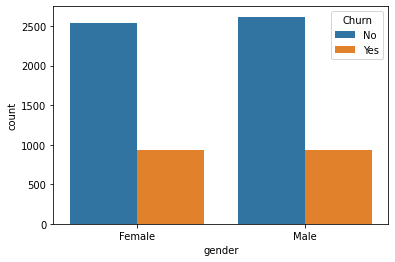

In [21]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

<AxesSubplot:xlabel='Partner', ylabel='count'>

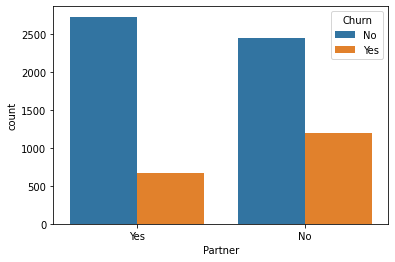

In [22]:
sns.countplot(x='Partner', hue='Churn', data=df)

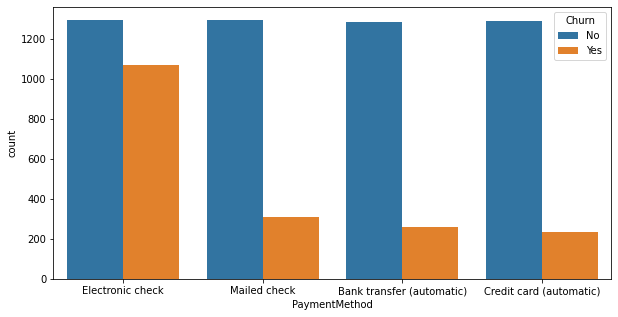

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod',hue='Churn' , data=df)
plt.show()

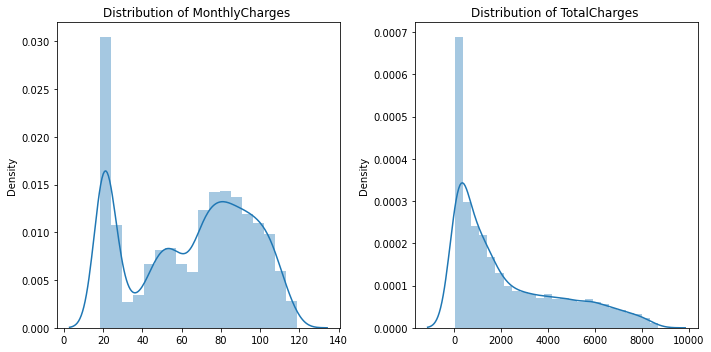

In [24]:
import warnings 
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(nrows =1,ncols=2,figsize=(10,5))
sns.distplot(x=df['MonthlyCharges'], ax=axs[0])
axs[0].set_title('Distribution of MonthlyCharges ')
sns.distplot(x=df['TotalCharges'], ax=axs[1])
axs[1].set_title('Distribution of TotalCharges ')
plt.tight_layout()

plt.show()

Tenure Mean : 32.421786120591584


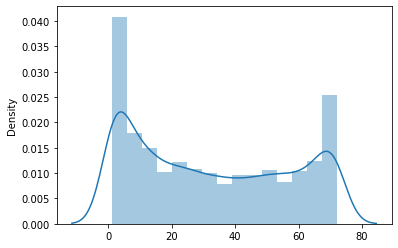

In [25]:
sns.distplot(x=df['tenure'])
print('Tenure Mean :',df['tenure'].mean())

In [26]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [27]:
df = df.drop(columns='customerID')

In [28]:
for column in df.columns:
    if df[column].dtypes == 'object':
        print('*************************')
        print(column,'\n')
        print(df[column].value_counts())

*************************
gender 

Male      3549
Female    3483
Name: gender, dtype: int64
*************************
Partner 

No     3639
Yes    3393
Name: Partner, dtype: int64
*************************
Dependents 

No     4933
Yes    2099
Name: Dependents, dtype: int64
*************************
PhoneService 

Yes    6352
No      680
Name: PhoneService, dtype: int64
*************************
MultipleLines 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
*************************
InternetService 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
*************************
OnlineSecurity 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
*************************
OnlineBackup 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
*****************

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
#column = df.drop(columns=['tenure','MonthlyCharges','SeniorCitizen','TotalCharges'])
column = df.columns.drop(['tenure','MonthlyCharges','SeniorCitizen','TotalCharges'])
column

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [31]:
df_new = pd.get_dummies(df, columns=column, drop_first = True) 

In [32]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [33]:
test = df_new.groupby('Churn_Yes').count()
test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn_Yes,,,,,,,,,,,,,,,,,,,,,
0,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,...,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
1,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [34]:
X = df_new.drop(columns='Churn_Yes')
y = df_new['Churn_Yes']

In [36]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [46]:
print(X_train.shape,X_test.shape)

(5625, 30) (1407, 30)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [49]:
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

cross_val = cross_val_score(models[0],X,y,cv=5)
print('Log reg scores ',cross_val)
cross_val_knn = cross_val_score(models[2],X,y,cv=5)
print('KNN scores',cross_val_knn )
cross_val_RF = cross_val_score(models[3],X,y,cv=5)
print('RF scores',cross_val_RF )
cross_val_svc = cross_val_score(models[1],X,y,cv=5)
cross_val_svc
print('SVC scores',cross_val_svc)

Log reg scores  [0.80597015 0.80525942 0.79089616 0.81009957 0.80654339]
KNN scores [0.75124378 0.77114428 0.75675676 0.75675676 0.76955903]
RF scores [0.79175551 0.79175551 0.77311522 0.80085349 0.79089616]
SVC scores [0.73418621 0.73418621 0.73470839 0.73399716 0.73399716]


In [61]:
param_grid = {'selectkbest__k': range(1,9),
              'selectkbest__score_func': [chi2]}

model = LogisticRegression()

# Define the pipeline to use
pipeline = Pipeline([('selectkbest', SelectKBest()),
                     ('logreg', model)])

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'selectkbest__k': 8, 'selectkbest__score_func': <function chi2 at 0x0000023D1460BF40>}
Best score: 0.7959111111111111


In [62]:
kbest = SelectKBest(chi2, k=8)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.fit_transform(X_test, y_test)
selected_features = kbest.get_support(indices=True)
selected_features

array([ 1,  2,  3, 10, 20, 22, 25, 28], dtype=int64)

In [63]:
df_new.iloc[:,selected_features]

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_Two year,PaymentMethod_Electronic check
0,1,29.85,29.85,0,0,0,0,1
1,34,56.95,1889.50,0,0,0,0,0
2,2,53.85,108.15,0,0,0,0,0
3,45,42.30,1840.75,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,1
...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,0,0,0
7039,72,103.20,7362.90,1,0,0,0,0
7040,11,29.60,346.45,0,0,0,0,1
7041,4,74.40,306.60,1,0,0,0,0


In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000)
svm = SVC()
rf = RandomForestClassifier()
nb = GaussianNB()

In [68]:
knn.fit(X_train_kbest,y_train)
nb.fit(X_train_kbest,y_train)
lr.fit(X_train_kbest,y_train)
svm.fit(X_train_kbest,y_train)
rf.fit(X_train_kbest,y_train)

RandomForestClassifier()

In [69]:
print("Knn")
print("Accuracy on train data",knn.score(X_train_kbest,y_train))
print("Accuracy on test data",knn.score(X_test_kbest,y_test))
print("Logistic Regression")
print("Accuracy on train data",lr.score(X_train_kbest,y_train))
print("Accuracy on test data",lr.score(X_test_kbest,y_test))
print("SVM")
print("Accuracy on train data",svm.score(X_train_kbest,y_train))
print("Accuracy on test data",svm.score(X_test_kbest,y_test))
print("RF")
print("Accuracy on train data",rf.score(X_train_kbest,y_train))
print("Accuracy on test data",rf.score(X_test_kbest,y_test))
print("NB")
print("Accuracy on train data",nb.score(X_train_kbest,y_train))
print("Accuracy on test data",nb.score(X_test_kbest,y_test))


Knn
Accuracy on train data 0.8302222222222222
Accuracy on test data 0.7633262260127932
Logistic Regression
Accuracy on train data 0.7953777777777777
Accuracy on test data 0.8031272210376688
SVM
Accuracy on train data 0.7322666666666666
Accuracy on test data 0.7420042643923241
RF
Accuracy on train data 0.9918222222222223
Accuracy on test data 0.7732764747690121
NB
Accuracy on train data 0.6595555555555556
Accuracy on test data 0.658137882018479


In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix

In [71]:
y_pred_knn = knn.predict(X_test_kbest)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_KNN = f1_score(y_test, y_pred_knn)

cf = confusion_matrix(y_test, y_pred_knn)
print(cf)
print("KNN accuracy:", accuracy_knn)
print("KNN recall:", recall_knn)
print("KNN F1 score:", f1_score_KNN)

[[927 117]
 [216 147]]
KNN accuracy: 0.7633262260127932
KNN recall: 0.4049586776859504
KNN F1 score: 0.4688995215311005


In [72]:
y_pred_lr = lr.predict(X_test_kbest)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

cf = confusion_matrix(y_test, y_pred_lr)
print(cf)
print("LR accuracy:", accuracy_lr)
print("LR recall:", recall_lr)
print("LR F1 score:", f1_score_lr)

[[959  85]
 [192 171]]
LR accuracy: 0.8031272210376688
LR recall: 0.47107438016528924
LR F1 score: 0.5525040387722133


In [73]:
y_pred_random_forest = rf.predict(X_test_kbest)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_score_random_forest = f1_score(y_test, y_pred_random_forest)

print("Random Forest accuracy:", accuracy_random_forest)
print("Random Forest recall:", recall_random_forest)
print("Random Forest F1 score:", f1_score_random_forest)

Random Forest accuracy: 0.7732764747690121
Random Forest recall: 0.43526170798898073
Random Forest F1 score: 0.4976377952755906


### Logistic regression is the best model for this data

In [74]:
result =  lr.predict([[1,29.85,29.85,0,0,0,0,1]])


if result == 1:
    print("Yes")
else:
    print("No")

Yes


#### searching the best parameters 

In [75]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}


grid_search = GridSearchCV(lr, param_grid, cv=5, verbose=2)
grid_search.fit(X_train_kbest, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

In [91]:
lr2 = LogisticRegression(C=0.1,penalty= 'l2')
lr2.fit(X_train_kbest,y_train)

LogisticRegression(C=0.1)

In [92]:
print("Logistic Regression")
print("Accuracy on train data",lr2.score(X_train_kbest,y_train))
print("Accuracy on test data",lr2.score(X_test_kbest,y_test))

Logistic Regression
Accuracy on train data 0.7960888888888888
Accuracy on test data 0.8073916133617626


In [93]:
from sklearn.metrics import precision_score


y_pred_lr2 = lr2.predict(X_test_kbest)
accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
prec_lr2 = precision_score(y_test, y_pred_lr2)
recall_lr2 = recall_score(y_test, y_pred_lr2)
f1_score_lr2 = f1_score(y_test, y_pred_lr2)

cf = confusion_matrix(y_test, y_pred_lr2)
print(cf)
print("LR accuracy:", accuracy_lr2)
print("LR Precision:",prec_lr2 )
print("LR recall:", recall_lr2)
print("LR F1 score:", f1_score_lr2)

[[967  77]
 [194 169]]
LR accuracy: 0.8073916133617626
LR Precision: 0.6869918699186992
LR recall: 0.465564738292011
LR F1 score: 0.555008210180624


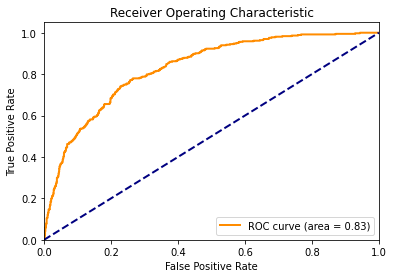

In [94]:
from sklearn.metrics import roc_curve, auc

y_score = lr2.predict_proba(X_test_kbest)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score) #ROC curve
roc_auc = auc(fpr, tpr) # area under the ROC curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [96]:
from sklearn.model_selection import learning_curve

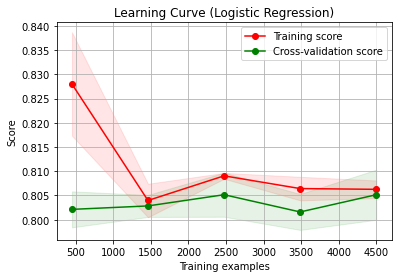

In [101]:
train_sizes, train_scores, test_scores = learning_curve(
    lr2, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [102]:
result =  lr2.predict([[2,100,200,1,0,0,0,1]])

if result == 1:
    print("Yes")
else:
    print("No")

Yes


In [101]:
import joblib

joblib.dump(lr2, 'my_model.joblib')

['my_model.joblib']